### Zadanie 1
Wczytaj pliki danych i scal je w jedną ramkę DataFrame. Wykonaj analizę typów danych podobnie jak w przykładach. Zmierz wielkość pamięci RAM ramki z domyślnymi typami danych.

In [1]:
import gc

gc.collect()

0

In [2]:
import fastparquet
import pandas as pd
import numpy

df0 = pd.read_parquet('../0000.parquet', engine='fastparquet')
df1 = pd.read_parquet('../0001.parquet', engine='fastparquet')
df2 = pd.read_parquet('../0002.parquet', engine='fastparquet')
df3 = pd.read_parquet('../0003.parquet', engine='fastparquet')
df4 = pd.read_parquet('../0004.parquet', engine='fastparquet')
df5 = pd.read_parquet('../0005.parquet', engine='fastparquet')

df = pd.concat([df0, df1, df2, df3, df4, df5])

display(df.head())
df.info()

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
0,28370919,3496776,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80,0,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,travel_&_adventure
1,13623950,3496776,BeyPed5hKj9,2237947779,2018-02-04 19:35:20,1,The dirty south was prime today. Top day with ...,86,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
2,28370905,3496776,Bunhd1DFVAG,2237947779,2019-03-05 08:03:11,1,Tech Tuesday. Been flat out on the tools. Got ...,168,3,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,science_&_technology
3,28370907,3496776,Bppi85gliQK,2237947779,2018-11-01 20:17:41,1,"On the tools, my favourite wheel builds @stans...",102,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
4,32170690,3496776,BuDfIyslzfw,2237947779,2019-02-19 08:10:11,1,Solid effort on the bar turn.\nFully turned.\n...,145,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life


<class 'pandas.core.frame.DataFrame'>
Index: 6884148 entries, 0 to 1147357
Data columns (total 17 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   sid                  int64 
 1   sid_profile          int64 
 2   post_id              object
 3   profile_id           int64 
 4   date                 object
 5   post_type            int64 
 6   description          object
 7   likes                int64 
 8   comments             int64 
 9   username             object
 10  bio                  object
 11  following            int64 
 12  followers            int64 
 13  num_posts            int64 
 14  is_business_account  bool  
 15  lang                 object
 16  category             object
dtypes: bool(1), int64(9), object(7)
memory usage: 899.4+ MB


In [3]:
sum(df.memory_usage())

943128276

In [4]:
sum(df.memory_usage(deep=True))

8035092984

In [5]:
def sizeof_fmt(num, suffix="B"):
    for unit in ("", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"):
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

In [6]:
sizeof_fmt(sum(df.memory_usage(deep=True)))

'7.5GiB'

### Zadanie 2
Dobierz bardziej optymalne typy danych i ponownie zmierz wielkość zajmowanej pamięci RAM. Porównaj obie wielkości na wykresie (wybierz pasujący typ wykresu).

In [7]:
pd.options.display.float_format = '{:.5f}'.format
df.describe()

,sid,sid_profile,profile_id,post_type,likes,comments,following,followers,num_posts
count,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000
mean,29558500.80795,3457955.52530,2547560155.32008,1.01382,384.63353,8.16274,1081.43728,19077.30757,857.96042
std,12816867.54420,1022692.84116,3229435999.72366,0.11679,6774.44149,140.75957,2615.01166,681331.31529,1987.41543
min,6025.00000,-1.00000,4.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,17093229.50000,3314935.00000,209447488.00000,1.00000,20.00000,0.00000,306.00000,302.00000,111.00000
50%,37450453.50000,3760938.00000,1099984196.00000,1.00000,46.00000,2.00000,657.00000,745.00000,330.00000
75%,40279382.25000,4087801.00000,4069290253.00000,1.00000,123.00000,5.00000,1204.00000,1764.00000,886.00000
max,43330548.00000,4510785.00000,15666951479.00000,3.00000,3311246.00000,173988.00000,1190947.00000,285457645.00000,183730.00000


 0   *sid*                  int64     --> int32

 1  *sid_profile*         int64     --> int32

 2   *post_id*              object    --> category

 3   *profile_id*           int64     --> category

 4   *date*                 object    --> datetime

 5   *post_type*            int64     --> category

 6   *description*          object    --> category

 7   *likes*                int64     --> int32

 8   *comments*             int64     --> int32

 9   *username*             object    --> category

 10  *bio*                  object    --> category

 11  *following*            int64     --> int32

 12  *followers*            int64     --> int32

 13  *num_posts*            int64     --> int32

 14  *is_business_account*  bool  

 15  *lang*                 object    --> category

 16  *category*             object    --> category
 

In [8]:
import numpy as np 

df_opt = df.copy()

df_opt['sid'] = df['sid'].astype(np.int32)
df_opt['post_id'] = df['post_id'].astype('category')
df_opt['profile_id'] = df['profile_id'].astype('category')
df_opt['date'] = pd.to_datetime(df['date'])
df_opt['post_type'] = df['post_type'].astype('category')
df_opt['description'] = df['description'].astype('category')
df_opt['likes'] = df['likes'].astype(np.int32)
df_opt['comments'] = df['comments'].astype(np.int32)
df_opt['username'] = df['username'].astype('category')
df_opt['bio'] = df['bio'].astype('category')
df_opt['followers'] = df['followers'].astype(np.int32)
df_opt['following'] = df['following'].astype(np.int32)
df_opt['num_posts'] = df['num_posts'].astype(np.int32)

df_opt['lang'] = df['lang'].astype('category')
df_opt['category'] = df['category'].astype('category')

sizeof_fmt(sum(df_opt.memory_usage(deep=True)))

'5.5GiB'

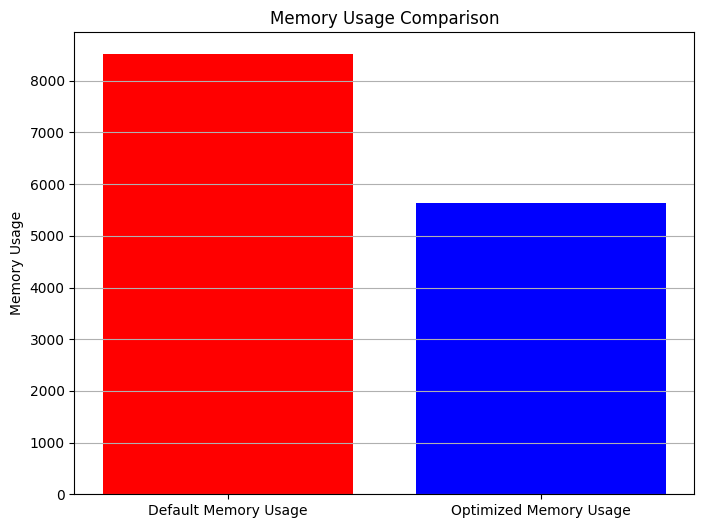

In [9]:
import matplotlib.pyplot as plt

default_memory_usage = sum(df.memory_usage(deep=True))/(1024**2) # MB
optimized_memory_usage = sum(df_opt.memory_usage(deep=True))/(1024**2)

plt.figure(figsize=(8, 6))
plt.bar(['Default Memory Usage', 'Optimized Memory Usage'], 
        [default_memory_usage, optimized_memory_usage], color=['red', 'blue'])

plt.title('Memory Usage Comparison')
plt.ylabel('Memory Usage')
plt.grid(True, axis='y')

plt.show()

### Zadanie 3
Wykonaj 3 wybrane operacje (grupowanie + agregacja, filtrowanie, itp.) na całej ramce i zmierz czas wykonania na danych oryginalnych i zoptymalizowanych. Wyświetl te czasy.

In [10]:
from datetime import datetime

start = datetime.now()
display(df[df['followers']>10000].groupby(['category']).agg({'likes':'sum', 'comments':'sum', 'following':'sum'})) #filter, group, aggregate
print(f'Czas: {datetime.now() - start}')

,likes,comments,following
category,,,
arts_&_culture,79122648,1066875,62212674
business_&_entrepreneurs,28302048,604717,31940761
celebrity_&_pop_culture,93021962,1115710,31589268
diaries_&_daily_life,646225072,8773857,253134268
family,37248237,508417,13196250
fashion_&_style,191484534,2813831,118457487
film_tv_&_video,116452535,1668000,34109637
fitness_&_health,23208075,451719,37015219
food_&_dining,133224109,2484564,132345963


Czas: 0:00:00.196571


In [11]:
start = datetime.now()
display(df_opt[df_opt['followers']>10000].groupby(['category']).agg({'likes':'sum', 'comments':'sum', 'following':'sum'})) #filter, group, aggregate
print(f'Czas: {datetime.now() - start}')

C:\Users\karol\AppData\Local\Temp\ipykernel_26116\936968516.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_opt[df_opt['followers']>10000].groupby(['category']).agg({'likes':'sum', 'comments':'sum', 'following':'sum'})) #filter, group, aggregate


,likes,comments,following
category,,,
arts_&_culture,79122648,1066875,62212674
business_&_entrepreneurs,28302048,604717,31940761
celebrity_&_pop_culture,93021962,1115710,31589268
diaries_&_daily_life,646225072,8773857,253134268
family,37248237,508417,13196250
fashion_&_style,191484534,2813831,118457487
film_tv_&_video,116452535,1668000,34109637
fitness_&_health,23208075,451719,37015219
food_&_dining,133224109,2484564,132345963


Czas: 0:00:00.063288


### Zadanie 4
Zapisz ramkę jako plik csv, z nagłówkami kolumn, bez indeksu. Sprawdź jaka jest różnica w wielkości pliku csv i sumy wielkości plików w formacie parquet (w eksploratorze, nie trzeba tego robić z poziomu kodu).

In [12]:
del df

import gc

gc.collect()


2726

In [13]:
df_opt.to_csv('default_df.csv', header=True, index=False)

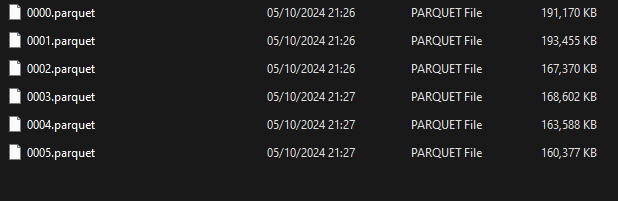 
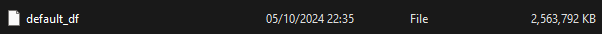

### Zadanie 5
Zmierz czas wczytywania danych z pliku csv dla 3 przypadków:

cały plik na raz,
cały plik ze wskazaniem parametru `chunksize` (możesz poeksperymentować z wielkością tego parametru),
z użyciem multiprocessingu zaprezentowanego w przykładzie (wcześniej podziel plik na kilka mniejszych), wskazując ilość procesów jako `ilość_rdzeni - 2` oraz drugi przypadek `(ilosc_rdzeni - 2) * 2`.

In [14]:
def count_time(func):
    def wrapper(*args, **kwargs):
        start = datetime.now()
        func(*args, **kwargs)
        print(f"Czas wczytywania {func.__name__}: {datetime.now() - start} sekund")
        return func(*args, **kwargs)
    return wrapper

# cały na raz
@count_time
def read_all():
    return pd.read_csv('default_df.csv', header=0)

#chunksize
@count_time
def read_chunk():
    chunks = pd.read_csv('default_df.csv', header=0, chunksize=2_000_000)
    return pd.concat(chunks)

In [15]:
dfa1 = read_all()
dfa2 = read_chunk()

Czas wczytywania read_all: 0:00:36.237214 sekund
Czas wczytywania read_chunk: 0:00:43.987262 sekund


Czas wczytywania dla 10 - 2: 0:00:39.259519 sekund

Czas wczytywania dla 8 * 2: 0:00:24.382330 sekund

### Zadanie 6 (z gwiazdką, nie jest obowiązkowe, ale pouczające)

Wczytaj każdy plik podzielony w zadaniu 5 do oddzielnej ramki danych. Dla każdej ramki policz sumę na kolumnie likes, a następnie policz sumę tych sum. Tę część zadania wykonaj sekwencyjnie. Teraz wykorzystując multiprocessing (i przykłady z labu) wykonaj to samo zadanie zrównoleglając je. Zmierz czas obu przypadków i go wyświetl.